# Fibonacci Sequence and efficient algorithms

In class you saw the Fibonacci sequence defined as
$$
F_n = \begin{cases}
        0 & n=0\\
        1 & n=1\\
        F_{n-1} + F_{n-2} & n > 1
      \end{cases}
$$

Using the recursive definition you arrived to the algorithm ${\tt fib1}$, which we showed has an exponential complexity. Then, we formulated the more efficient iterative algorithm ${\tt fib2}$ with $O(n)$ complexity (given that additions are constant time). Now, we are going to try for an even more efficient algorithm. We can write

$$\begin{cases} F_1 & = F_1 \\ F_2 & = F_1 + F_0 \end{cases}$$

In matrix notation:

$$\begin{pmatrix} F_1 \\ F_2\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}$$

Similarly:
$$
    \begin{pmatrix} F_2 \\ F_3\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}\cdot \begin{pmatrix} F_1 \\ F_2\end{pmatrix}= \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}^2\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}
$$
and in general:
$$
    \begin{pmatrix} F_n \\ F_{n+1}\end{pmatrix} = \begin{pmatrix} 0 & 1\\ 1& 1\end{pmatrix}^n\cdot \begin{pmatrix} F_0 \\ F_1\end{pmatrix}.
$$

First we need a way to multiply matrices. For various technical reasons, you will implement your own $2 \times 2$ matrix multiplication.

In [ ]:
import timeit
import matplotlib.pyplot as plt
fib = [
    0,
    1,
    1,
    2,
    3,
    5,
    8,
    13,
    21,
    34,
    55,
    89,
    144,
    233,
    377,
    610,
    987,
    1597,
    2584,
    4181,
    6765,
    10946,
    17711,
    28657,
    46368,
    75025,
    121393,
    196418,
    317811,
    514229,
    832040,
    1346269,
    2178309,
    3524578,
    5702887
]

In [ ]:
def matrix_multiply(A, B):
    # TODO: Write the matrix multiplication function
    # Reminder: (AB)[i, j] = sum_k A[i, k] * B[k, j]
    # You can achieve this with 8 multiplications and 4 additions
    return [[A[0][0] * B[0][0] + A[0][1] * B[1][0], A[0][0] * B[0][1] + A[0][1] * B[1][1]],
            [A[1][0] * B[0][0] + A[1][1] * B[1][0], A[1][0] * B[0][1] + A[1][1] * B[1][1]]]

Using your `matrix_multiply` function you can now implement the iterative algorithm by computing the correct power of the matrix.

In [ ]:
A = [[0, 1], [1, 1]]

def fib2(n: int):
    if n == 0: return 0
    if n == 1: return 1
    An = [[1, 0], [0, 1]]
    # TODO: Use matrix_multiply `n` times to compute An

    for i in range(n):
        An = matrix_multiply(An, A)

    return An[0][1]

Test how fast your implementation is

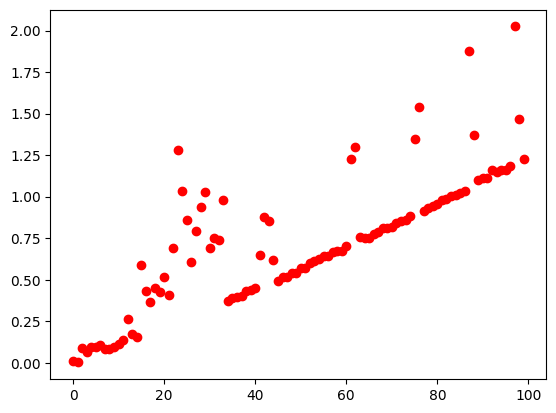

In [ ]:
N = 30
# When it's ready to submit, uncomment the next line
N = 100
fib2_results = [fib2(i) for i in range(len(fib))]
for i in range(0, 35):
    assert fib[i] == fib2_results[i], f'fib({i}) = {fib[i]}, but you returned fib2({i}) = {fib2_results[i]}'

rtime2 = [timeit.timeit(stmt='fib2({})'.format(n), globals=globals(), number=10000) for n in range(N)]
plt.plot(range(N), rtime2, 'or')

Now it's time to speed up calculations further. Use your answer from question 2b to write `fib3`.

In [ ]:
def pow(X, n):
      if n == 1: return X

      half = pow(X, n // 2)
      half_2 = matrix_multiply(half, half)

      if n % 2: return matrix_multiply(half_2, X) # n odd
      else: return half_2 # n even

def fib3(n: int):
    if n == 0: return 0
    if n == 1: return 1

    return pow([[0, 1], [1, 1]], n)[0][1]

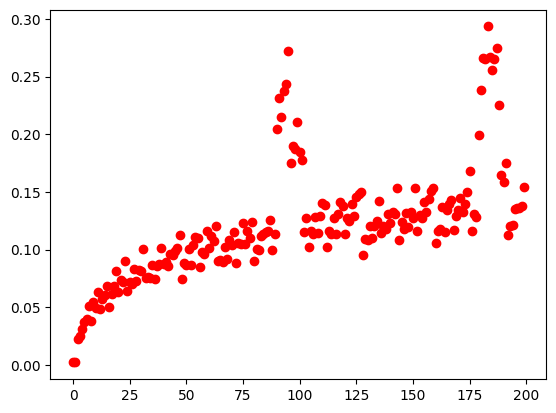

In [ ]:
N = 60
# When it's ready to submit, uncomment the next line
N = 200
fib3_results = [fib3(i) for i in range(len(fib))]
for i in range(0, 35):
    assert fib[i] == fib3_results[i], f'fib({i}) = {fib[i]}, but you returned fib3({i}) = {fib3_results[i]}'

rtime2 = [timeit.timeit(stmt='fib3({})'.format(n), globals=globals(), number=10000) for n in range(N)]
plt.plot(range(N), rtime2, 'or')